In [3]:
% matplotlib inline
import pandas as pd
import os
import datashader as ds
import datashader.transfer_functions as tf
import folium

In [4]:
# Load from HDF5 file

project = os.path.realpath('./..')
datadir = os.path.join(project, 'data')

with pd.HDFStore(os.path.join(datadir, 'results.h5')) as store:
    results = store.results

In [5]:
results.head()

,lat,lng,text,timeStamp,user_id,mb_cluster,db_cluster,cluster
id,,,,,,,,
377652254096228352,37.446100,-121.883557,@Tanner_Cortez hey checkout the website: http:...,2013-09-11 04:38:08,224874450,33,-1.0,NaN
377652262325456897,37.356131,-121.842867,i laugh a lot with that line,2013-09-11 04:38:10,54351774,22,-1.0,NaN
377652264682655744,37.364664,-122.009629,sons of anarchy is back on woop woop,2013-09-11 04:38:11,343219606,21,-1.0,NaN
377652271116722176,37.382600,-121.995000,Drinking a Fresh Squeezed IPA by @deschutesbee...,2013-09-11 04:38:12,1569395935,21,-1.0,NaN
377652275147444224,37.756149,-122.152813,I have 8 am classes this quarter ... I need to...,2013-09-11 04:38:13,399164195,84,0.0,84.0


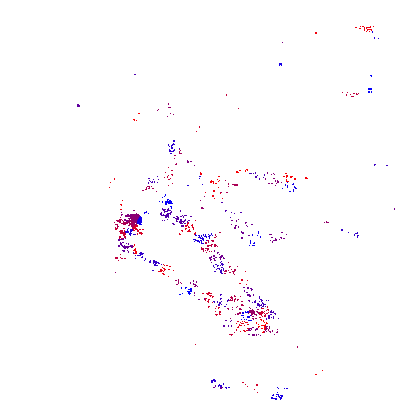

In [6]:
# Visualize points with datashader
cvs = ds.Canvas(plot_width=400, plot_height=400)
agg = cvs.points(results, 'lng', 'lat', ds.mean('cluster'))
tf.interpolate(agg, cmap=['blue', 'red'])

In [156]:
df = results[results['text'].str.contains("berkeley")]

In [157]:
df.cluster.value_counts().head()

3.04    71
3.03    49
3.11     3
3.07     3
3.12     3
Name: cluster, dtype: int64

In [167]:
cluster = results[results.cluster == 3.03]
print len(cluster)

2465


In [168]:
cluster.head().iloc[0,1]

-122.2683037

In [169]:
map_data = folium.Map(location=[cluster.iloc[0,0], cluster.iloc[0,1]], tiles='Stamen Toner', zoom_start=14)

for index, series in cluster.sample(100).iterrows():
    folium.Marker([series['lat'], series['lng']], popup=series['text']).add_to(map_data)
    
map_data.save('map.html')

In [170]:
%%HTML
<iframe width="100%" height="500" src="map.html"></iframe>

In [166]:
cluster.sample(50)

,lat,lng,text,timeStamp,user_id,mb_cluster,db_cluster,cluster
id,,,,,,,,
380393088604045313,37.870713,-122.260563,@AyeJil $47.50 😒😒,2013-09-18 18:09:14,65277044,3,4.0,3.04
385605635926007808,37.872927,-122.260018,@AGuyNamedNam it's the worst thing that could ...,2013-10-03 03:22:02,783786025,3,4.0,3.04
380146369354149888,37.866883,-122.259053,Went and sold significant bits of my life from...,2013-09-18 01:48:51,267576994,3,4.0,3.04
384858943643586560,37.866301,-122.257997,Feels like Arcadia with this campus wide powe...,2013-10-01 01:54:57,59590145,3,4.0,3.04
381358017821671424,37.867438,-122.255486,Not setting my alarm for tomorrow ha yas me &a...,2013-09-21 10:03:31,242229525,3,4.0,3.04
384522428610662400,37.869003,-122.252063,@trevordavis89 we gotta be at 6:30 am meetings...,2013-09-30 03:37:45,348359952,3,4.0,3.04
383057609613262848,37.868875,-122.257255,@MrTimKaos #newlife #itsbeautiful #aubreysaidso,2013-09-26 02:37:05,444121996,3,4.0,3.04
380471678905491456,37.863100,-122.255993,Brb. http://t.co/7kqq104C34,2013-09-18 23:21:31,26942269,3,4.0,3.04
383128074704781313,37.872752,-122.259663,@jjjaneyj I miss your sexy mirror selfies girl ;D,2013-09-26 07:17:05,1053967742,3,4.0,3.04
